In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set the max columns to none
pd.set_option('display.max_columns', None)

In [25]:
pollution = pd.read_csv("../data/EmissionsProEnvVotes.csv")
pollution

,icpsr,linktovote,congress,chamber,rollnumber,cast_code,prob,proEnv,lhs,bioguide_id,gender,born_year2,party,everHighSO2,everHighCO2,everHighNOx
0,1366,109.S.616,109,S,616,0.0,74.7,0.0,1.0,B001210,M,1917.0,Democrat,NaN,NaN,NaN
1,1366,110.S.226,110,S,226,1.0,81.2,1.0,1.0,B001210,M,1917.0,Democrat,NaN,NaN,NaN
2,1366,110.S.325,110,S,325,1.0,99.9,0.0,0.0,B001210,M,1917.0,Democrat,NaN,NaN,NaN
3,1366,110.S.483,110,S,483,NaN,99.9,1.0,NaN,B001210,M,1917.0,Democrat,NaN,NaN,NaN
4,1366,110.S.543,110,S,543,1.0,100.0,1.0,1.0,B001210,M,1917.0,Democrat,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96271,99911,113.S.369,113,S,369,NaN,96.9,0.0,NaN,O000167,M,1961.0,Democrat,NaN,NaN,NaN
96272,99911,113.S.4,113,S,4,1.0,100.0,1.0,1.0,O000167,M,1961.0,Democrat,NaN,NaN,NaN
96273,99911,113.S.571,113,S,571,0.0,98.0,0.0,1.0,O000167,M,1961.0,Democrat,NaN,NaN,NaN
96274,99911,113.S.655,113,S,655,1.0,85.4,0.0,0.0,O000167,M,1961.0,Democrat,NaN,NaN,NaN


In [26]:
len(pollution["icpsr"].unique())

1030

In [27]:
pollution["congress"].value_counts()

114    27912
115    21317
113    18553
112    13391
110     8308
111     5393
109     1402
Name: congress, dtype: int64

In [28]:
pollution = pd.read_csv("../data/EmissionsProEnvVotes.csv")[["icpsr", "chamber", "congress", "born_year2", "everHighSO2", "everHighCO2", "everHighNOx"]]\
            .drop_duplicates().dropna().reset_index(drop=True)
pollution

,icpsr,chamber,congress,born_year2,everHighSO2,everHighCO2,everHighNOx
0,14651,S,109,1942.0,1.0,1.0,1.0
1,14651,S,110,1942.0,1.0,1.0,1.0
2,14651,S,111,1942.0,1.0,1.0,1.0
3,14651,S,112,1942.0,1.0,1.0,1.0
4,14651,S,113,1942.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
845,90327,H,109,1946.0,0.0,0.0,0.0
846,90327,H,110,1946.0,0.0,0.0,0.0
847,90327,H,111,1946.0,0.0,0.0,0.0
848,90327,H,112,1946.0,0.0,0.0,0.0


In [29]:
len(pollution["icpsr"].unique())

228

In [38]:
pollution[["icpsr", "congress"]].drop_duplicates()["congress"].value_counts()

114    158
115    145
113    144
112    127
111    112
110     85
109     79
Name: congress, dtype: int64

In [31]:
sa_bs = pd.read_csv("../data/minas_esg/sustainalytics_bs_merge.csv", encoding="latin-1")\
        .dropna(subset=["icpsr_id", "amountE"])
sa_bs

,CapitalIQ_ID,Date,Company,ISIN,Ticker,total_esg_score,governance_score,social_score,environment_score,new_date,year_month,month_date,year,CIQID,NEWDATE,merge_date,GVKEY,LPERMNO,LINKTYPE,LPERMCO,LINKDT,LINKENDDT,cusip,ticker,siccd,evtdate,sell,buy,amount,amountE,firstname,lastname,gender,fecid,govtrack_id,icpsr_id,votesmart_id,id,date_of_birth,district,congress,party,seniority,frequent_trader,i.NEWDATE,i.year_month,X,Company.Name,i.month_date,i.year,ESG_risk
2,IQ168569,2019-07-01,American Airlines Group Inc,US02376R1023,AAL,55.29,64.99,58.82,44.32,2019-07-01,201907,2019m7,2019,IQ168569,2019-07-01,2019-06-24,1045,21020,LC,20010,19620131,20120104,02376R102,AAL,4512,2019-06-24,1.0,0.0,1k-10k,1000.0,Stephen,Cohen,M,H6TN09068,412236.0,20748.0,24340.0,C001068,1949-05-24,TN09,112.0,D,6.0,0,2019-06-24,201906,NaN,American Airlines Group Inc. (NasdaqGS:AAL),2019m6,2019,average
6,IQ168569,2019-09-02,American Airlines Group Inc,US02376R1023,AAL,55.24,64.99,58.82,44.19,2019-09-02,201909,2019m9,2019,IQ168569,2019-09-02,2020-06-11,1045,21020,LC,20010,19620131,20120104,02376R102,AAL,4512,2020-06-11,0.0,1.0,1k-10k,1000.0,Adam,Kinzinger,M,H0IL11052,412421.0,21128.0,116559.0,K000378,1978-02-27,IL11,112.0,R,2.0,0,2020-06-11,202006,NaN,American Airlines Group Inc. (NasdaqGS:AAL),2020m6,2020,average
7,IQ168569,2019-09-02,American Airlines Group Inc,US02376R1023,AAL,55.24,64.99,58.82,44.19,2019-09-02,201909,2019m9,2019,IQ168569,2019-09-02,2020-07-02,1045,21020,LC,20010,19620131,20120104,02376R102,AAL,4512,2020-07-02,1.0,0.0,1k-10k,8000.5,Pat,Roberts,M,S6KS00080,300083.0,14852.0,26866.0,R000307,1936-04-20,KSS1,112.0,R,15.0,1,2020-07-02,202007,NaN,American Airlines Group Inc. (NasdaqGS:AAL),2020m7,2020,average
10,IQ168569,2019-09-02,American Airlines Group Inc,US02376R1023,AAL,55.24,64.99,58.82,44.19,2019-09-02,201909,2019m9,2019,IQ168569,2019-09-02,2020-06-09,1045,21020,LC,20010,19500101,19620130,02376R102,AAL,4512,2020-06-09,0.0,1.0,1k-10k,1000.0,Adam,Kinzinger,M,H0IL11052,412421.0,21128.0,116559.0,K000378,1978-02-27,IL11,112.0,R,2.0,0,2020-06-09,202006,NaN,American Airlines Group Inc. (NasdaqGS:AAL),2020m6,2020,average
11,IQ168569,2019-09-02,American Airlines Group Inc,US02376R1023,AAL,55.24,64.99,58.82,44.19,2019-09-02,201909,2019m9,2019,IQ168569,2019-09-02,2020-06-30,1045,21020,LC,20010,19500101,19620130,02376R102,AAL,4512,2020-06-30,0.0,1.0,1k-10k,8000.5,Pat,Roberts,M,S6KS00080,300083.0,14852.0,26866.0,R000307,1936-04-20,KSS1,112.0,R,15.0,1,2020-06-30,202006,NaN,American Airlines Group Inc. (NasdaqGS:AAL),2020m6,2020,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,IQ157028,2019-09-02,"Element Solutions, Inc.",US28618M1062,ESI,50.26,55.89,52.42,44.85,2019-09-02,201909,2019m9,2019,IQ157028,2019-09-02,2020-04-02,315318,14406,LC,54703,20140123,E,28618M106,ESI,2869,2020-04-02,0.0,1.0,10k-49k,15000.0,Greg,Gianforte,M,H8MT01182,412736.0,21751.0,168594.0,G000584,1961-04-17,MT01,115.0,R,2.0,1,2020-04-02,202004,NaN,Element Solutions Inc (NYSE:ESI),2020m4,2020,average
54201,IQ157028,2019-09-02,"Element Solutions, Inc.",US28618M1062,ESI,50.26,55.89,52.42,44.85,2019-09-02,201909,2019m9,2019,IQ157028,2019-09-02,2020-04-03,315318,14406,LC,54703,20140123,E,28618M106,ESI,2869,2020-04-03,0.0,1.0,1k-10k,1000.0,Greg,Gianforte,M,H8MT01182,412736.0,21751.0,168594.0,G000584,1961-04-17,MT01,115.0,R,2.0,1,2020-04-03,202004,NaN,Element Solutions Inc (NYSE:ESI),2020m4,2020,average
54206,IQ241782379,2016-12-08,Allegion Plc,IE00BFRT3W74,ALLE,55.82,62.00,58.05,50.00,2016-12-08,201612,2016m12,2016,IQ241782379,2016-12-08,2016-12-06,316056,14297,LC,54641,20131202,E,G0176J109,ALLE,6799,2016-12-06,1.0,0.0,1k-10k,1000.0,Bob,Gibbs,M,H0OH18077,412463.0,21165.0,45466.0,G000563,1954-06-14,OH18,112.0,R,2.0,0,2016-12-06,201612,NaN,Allegion plc (NYSE:ALLE),2016m12,2016,average
54208,IQ241782379,2017-12-06,Allegion Pl

In [23]:
len(sa_bs['icpsr_id'].unique())

224

In [32]:
sa_bs["congress"].value_counts()

112.0    27122
114.0     4921
113.0     4298
115.0     3480
Name: congress, dtype: int64

In [34]:
bs_data = pd.read_csv("../data/sacerdote/bs_data.csv")
bs_data

,ticker,permno,siccd,evtdate,sell,buy,amount,amountE,asset,firstname,lastname,gender,fecid,govtrack_id,icpsr_id,votesmart_id,id,cid,date_of_birth,district,congress,party,seniority,frequent_trader
0,CBNK,91397.0,6036.0,2012-01-03,1.0,0.0,250k+,750000.5,Capital World Growth & Income Fund,Richard,Hanna,NaN,H8NY24066,NaN,NaN,NaN,NaN,N00030197,NaN,NY24,112.0,R,NaN,1.0
1,OPY,78451.0,6211.0,2012-01-03,0.0,1.0,100k-249k,175000.5,Oppenheimer Developing Markets Fund,Brad,Schneider,M,H2IL10068,412534.0,21326.0,134948.0,S001190,N00033101,1961-08-20,10,113.0,D,2.0,1.0
2,STZ,64899.0,2084.0,2012-01-03,1.0,0.0,1k-10k,8000.5,Constellation Brands,Adam,Schiff,M,H0CA27085,400361.0,20104.0,9489.0,S001150,N00009585,1960-06-22,29,112.0,D,12.0,0.0
3,HON,10145.0,3724.0,2012-01-03,0.0,1.0,1k-10k,8000.5,Honeywell International,Alan,Lowenthal,M,H2CA00104,412521.0,21313.0,16469.0,L000579,N00033274,1941-03-08,47,113.0,D,2.0,0.0
4,NUAN,82759.0,7372.0,2012-01-03,1.0,0.0,10k-49k,32500.5,Nuance Communications,Bill,Owens,NaN,H0NY23081,NaN,NaN,NaN,NaN,N00031011,NaN,NY23,112.0,D,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50600,BRK.B,NaN,NaN,2020-12-24,0.0,1.0,1k-10k,1000.0,NaN,Donald,Beyer,M,H4VA08224,412657.0,21554.0,1707.0,B001292,N00036018,1950-06-20,VA08,114.0,D,2.0,1.0
50601,OHI,77857.0,8062.0,2020-12-31,1.0,0.0,10k-49k,100000.0,NaN,Billy,Long,M,H0MO07113,412445.0,21150.0,123401.0,L000576,N00030676,1955-08-11,MO07,112.0,R,2.0,0.0
50602,SO,18411.0,4911.0,2020-12-31,1.0,0.0,1k-10k,50000.0,NaN,Billy,Long,M,H0MO07113,412445.0,21150.0,123401.0,L000576,N00030676,1955-08-11,MO07,112.0,R,2.0,0.0
50603,KMI,12558.0,4924.0,2020-12-31,1.0,0.0,50k-99k,50000.0,NaN,Billy,Long,M,H0MO07113,412445.0,21150.0,123401.0,L000576,N00030676,1955-08-11,MO07,112.0,R,2.0,0.0


In [36]:
bs_data["congress"].value_counts()

112.0    32065
114.0     5232
113.0     5040
115.0     4039
116.0     3944
109.0      258
111.0        1
Name: congress, dtype: int64

In [37]:
bs_data[["icpsr_id", "congress"]].drop_duplicates()["congress"].value_counts()

112.0    161
113.0     46
115.0     28
114.0     24
116.0      1
109.0      1
111.0      1
Name: congress, dtype: int64

(array([5882., 5872., 7770., 4699., 3871., 3691., 4869., 4490., 4045.,
        5416.]),
 array([15342. , 15670.5, 15999. , 16327.5, 16656. , 16984.5, 17313. ,
        17641.5, 17970. , 18298.5, 18627. ]),
 <BarContainer object of 10 artists>)

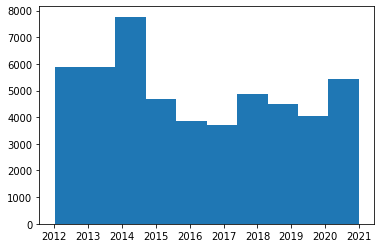

In [41]:
plt.hist(pd.to_datetime(bs_data["evtdate"]))